In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time
from collections import deque
import math

In [3]:
G1 = nx.nx_agraph.read_dot('./Dataset/LesMiserables.dot/LesMiserables.dot')
edge_list =[]
for e in G1.edges():
    u,v = e
    edge_list.append((int(u), int(v)))

node_list = []
for i in G1.nodes():
    node_list.append(int(i))
    
print(len(edge_list))
print(len(node_list))

254
77


In [22]:
adjacency_list = {}
for edge in edge_list:
    source, target = edge
    if source not in adjacency_list:
        adjacency_list[source] = []
    adjacency_list[source].append(target)
#     # for undirected graph, we also add the reverse edge
    if target not in adjacency_list:
        adjacency_list[target] = []
    adjacency_list[target].append(source)
    
print(adjacency_list)

{1: [2], 2: [1, 3, 4, 5, 6, 7, 8, 9, 10, 11], 3: [2, 4, 11], 4: [2, 3, 11], 5: [2], 6: [2], 7: [2], 8: [2], 9: [2], 10: [2], 11: [2, 3, 4, 12, 13, 14, 15, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 44, 45, 49, 50, 52, 56, 59, 65, 69, 70, 71, 72, 73], 12: [11], 13: [11, 24], 14: [11], 15: [11], 16: [11], 24: [11, 13, 25, 26, 28, 30, 32, 17, 18, 19, 20, 21, 22, 23, 31], 25: [11, 24, 26, 27, 28, 69, 70, 71, 42, 43, 51], 26: [11, 24, 25, 27, 28, 49, 56, 69, 70, 71, 72, 42, 43, 40, 41, 76], 27: [11, 25, 26, 28, 44, 50, 52, 56, 73, 18, 55], 28: [11, 24, 25, 26, 27, 29, 30, 32, 34, 44, 49, 59, 69, 70, 71, 72, 73], 29: [11, 28, 45, 46], 30: [11, 24, 28, 35, 36, 37, 38, 39], 32: [11, 24, 28, 31], 33: [11], 34: [11, 28], 35: [11, 30, 36, 37, 38, 39], 36: [11, 30, 35, 37, 38, 39], 37: [11, 30, 35, 36, 38, 39], 38: [11, 30, 35, 36, 37, 39], 39: [11, 30, 35, 36, 37, 38], 44: [11, 27, 28], 45: [11, 29], 49: [11, 26, 28, 56, 59, 65, 69, 70, 72, 76, 58, 63, 47, 60, 61, 62, 64, 66,

In [23]:
# BFS Implementation
def bfs(graph, root):
    visited, queue = set(), deque([root])
    bfs_tree = {root: []}
    order_visited = [root]
    visited.add(root)  
    while queue:
        vertex = queue.popleft()
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
                if neighbour not in bfs_tree:
                    bfs_tree[neighbour] = []  
                bfs_tree[vertex].append(neighbour)
                order_visited.append(neighbour)
    return bfs_tree, order_visited

# DFS Implementation
def dfs(graph, root, visited=None, order_visited=None, dfs_tree=None):
    if visited is None:
        visited = set()
    if order_visited is None:
        order_visited = []
    if dfs_tree is None:
        dfs_tree = {root: []}
    visited.add(root)
    order_visited.append(root)
    for neighbour in graph[root]:
        if neighbour not in visited:
            dfs_tree[root].append(neighbour)
            dfs_tree[neighbour] = []  # Add this line
            dfs(graph, neighbour, visited, order_visited, dfs_tree)
    return dfs_tree, order_visited

# Layered Tree Layout
def layered_tree_layout(tree, root):
    levels = {root: 0}
    visited = set()
    def recurse(node, level):
        visited.add(node)
        for child in tree[node]:
            if child not in visited:
                levels[child] = level + 1
                recurse(child, level + 1)
    recurse(root, 0)
    return levels

# Time Complexity Analysis
start_time = time.time()
bfs_tree, bfs_order = bfs(adjacency_list, 1)
end_time = time.time()
print(f"BFS Time Complexity: {end_time - start_time}")

start_time = time.time()
dfs_tree, dfs_order = dfs(adjacency_list, 1)
end_time = time.time()
print(f"DFS Time Complexity: {end_time - start_time}")

# Apply to Les Misérables network
bfs_tree, bfs_order = bfs(adjacency_list, 1)
dfs_tree, dfs_order = dfs(adjacency_list, 1)

# Layered Tree Layout
bfs_layout = layered_tree_layout(bfs_tree, 1)
dfs_layout = layered_tree_layout(dfs_tree, 1)

print(f'\nBFS = {bfs_order}\n')
print(f"DFS = {dfs_order}")

BFS Time Complexity: 0.0009999275207519531
DFS Time Complexity: 0.0

BFS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 44, 45, 49, 50, 52, 56, 59, 65, 69, 70, 71, 72, 73, 17, 18, 19, 20, 21, 22, 23, 31, 42, 43, 51, 40, 41, 76, 55, 46, 58, 63, 47, 60, 61, 62, 64, 66, 67, 74, 75, 77, 57, 53, 54, 68, 48]

DFS = [1, 2, 3, 4, 11, 12, 13, 24, 25, 26, 27, 28, 29, 45, 46, 30, 35, 36, 37, 38, 39, 32, 31, 34, 44, 49, 56, 50, 52, 55, 53, 40, 54, 51, 57, 59, 65, 58, 42, 69, 70, 71, 72, 76, 43, 63, 60, 61, 62, 64, 66, 67, 77, 68, 18, 17, 19, 20, 21, 22, 23, 47, 48, 74, 75, 73, 41, 14, 15, 16, 33, 5, 6, 7, 8, 9, 10]


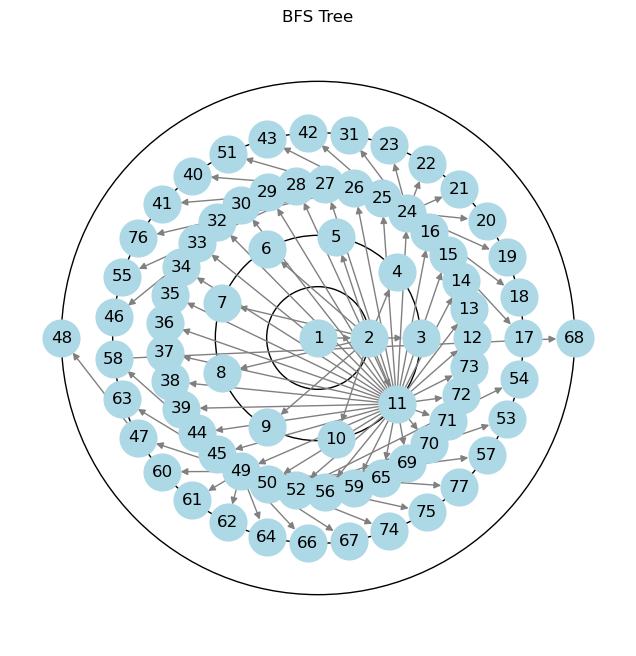

In [24]:
from collections import defaultdict, deque
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

def addEdge(graph, u, v):
    graph[u].append(v)

def bfs(graph, root):
    visited, queue = set(), deque([root])
    bfs_tree = {root: []}
    order_visited = [root]
    visited.add(root)  
    while queue:
        vertex = queue.popleft()
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)  
                queue.append(neighbour)
                if neighbour not in bfs_tree:
                    bfs_tree[neighbour] = []  
                bfs_tree[vertex].append(neighbour)
                order_visited.append(neighbour)
    return bfs_tree, order_visited



def radial_positions(tree, root):
    levels = layered_tree_layout(tree, root)
    pos = {root: (0, 0)}  # root is at the center
    for level in range(1, max(levels.values()) + 1):
        nodes_at_level = [node for node, node_level in levels.items() if node_level == level]
        for i, node in enumerate(nodes_at_level):
            angle = 2 * math.pi * i / len(nodes_at_level)  
            x = level * math.cos(angle)
            y = level * math.sin(angle)
            pos[node] = (x, y)
    return pos


bfs_tree, bfs_order = bfs(adjacency_list, 1)

# Convert the BFS tree into a NetworkX DiGraph object
bfs_tree_graph = nx.DiGraph(bfs_tree)


bfs_pos = radial_positions(bfs_tree, 1)

# Draw the BFS tree
plt.figure(figsize=(8, 8))

max_level = round(max(bfs_pos.values(), key=lambda x: (x[0]**2 + x[1]**2)**0.5)[0])
for level in range(max_level + 1):
    circle = plt.Circle((0, 0), level, color='black', fill=False)
    plt.gca().add_patch(circle)

nx.draw(bfs_tree_graph, bfs_pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')

plt.title('BFS Tree')
plt.xlim(-max_level-1, max_level+1)
plt.ylim(-max_level-1, max_level+1)
plt.gca().set_aspect('equal')
plt.show()


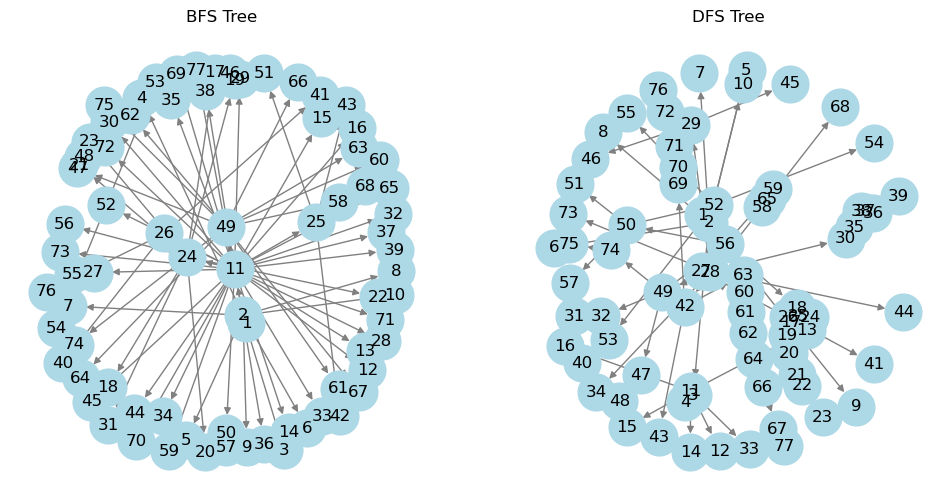

In [17]:
# Convert the dictionaries to NetworkX DiGraph objects
bfs_tree_graph = nx.DiGraph(bfs_tree)
dfs_tree_graph = nx.DiGraph(dfs_tree)

# Visualize the trees
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(bfs_tree_graph, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')
plt.title('BFS Tree')

plt.subplot(122)
nx.draw(dfs_tree_graph, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')
plt.title('DFS Tree')

plt.show()


In [25]:
def bfs_positions(tree, root):
    levels = layered_tree_layout(tree, root)
    pos = {}
    for node in bfs_order:
        level = levels[node]
        same_level_nodes = [n for n, l in levels.items() if l == level]
        idx = same_level_nodes.index(node)
        pos[node] = (idx, -level)  # negative to make root at top
    return pos

def dfs_positions(tree, root):
    levels = layered_tree_layout(tree, root)
    pos = {}
    for node in dfs_order:
        level = levels[node]
        same_level_nodes = [n for n, l in levels.items() if l == level]
        idx = same_level_nodes.index(node)
        pos[node] = (level, -idx)  # negative to make root at top
    return pos

bfs_pos = bfs_positions(bfs_tree, 1)
dfs_pos = dfs_positions(dfs_tree, 1)

bfs_tree_graph = nx.DiGraph(bfs_tree)
dfs_tree_graph = nx.DiGraph(dfs_tree)

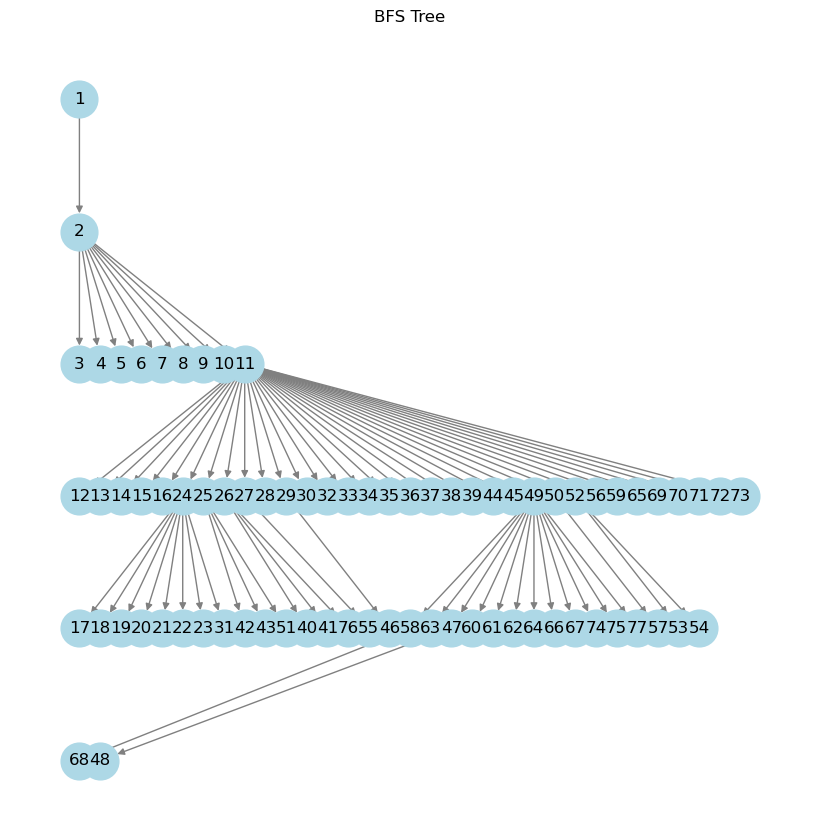

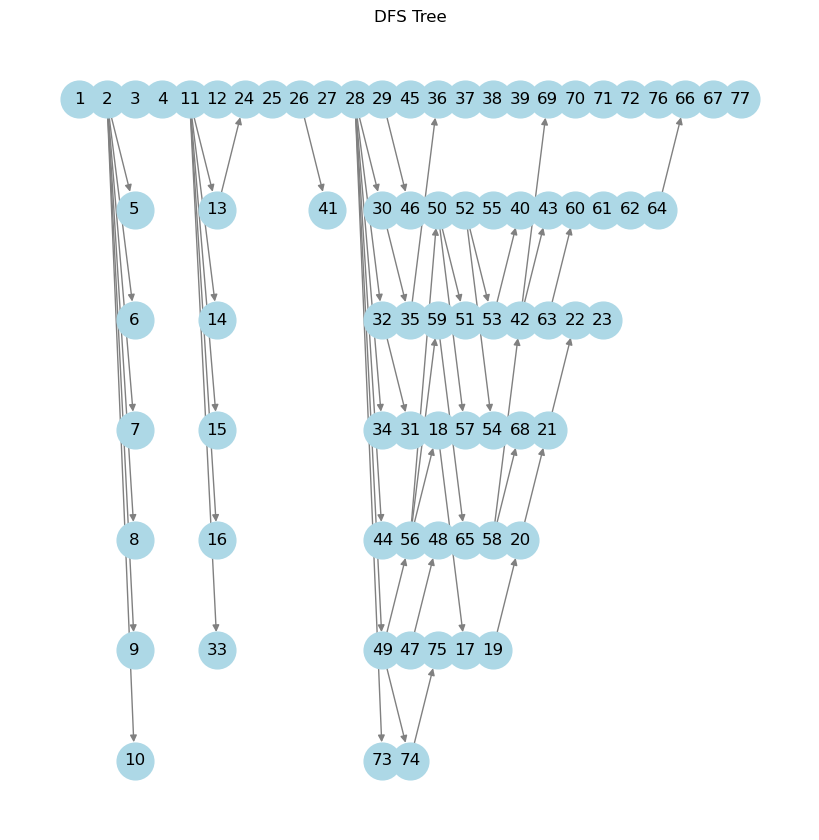

In [26]:
# Draw the BFS tree
plt.figure(figsize=(8, 8))
nx.draw(bfs_tree_graph, bfs_pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')
labels = nx.get_node_attributes(bfs_tree_graph, 'label') 
nx.draw_networkx_labels(bfs_tree_graph, bfs_pos, labels=labels)
plt.title('BFS Tree')
plt.show()

# Draw the DFS tree
plt.figure(figsize=(8, 8))
nx.draw(dfs_tree_graph, dfs_pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')
labels = nx.get_node_attributes(dfs_tree_graph, 'label') 
nx.draw_networkx_labels(dfs_tree_graph, dfs_pos, labels=labels)
plt.title('DFS Tree')
plt.show()
